<b>Universidad Galileo</b><br/>
<b>Maestría de Ciencia de Datos</b><br/>
<b>Statistical Learning II</b><br/>
<b>Jose Godoy</b><br/>
<b>Carnet 22000570</b><br/>
<b>6 de agosto 2022</b><br/>

# 1. Cargando librerías

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# 2. Cargamos la data

In [2]:
data = np.load('proyecto_data/proyecto_training_data.npy')
columnas_nombre = np.array(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
columnas_descripcion = np.array(['Precio', 'Feedback', 'Metros cuadrados 1L', 'Habitaciones', 'Año de construcción', 'Distancia lineal desde la calle'])
data_casas = pd.DataFrame(data, columns = columnas_nombre)
data_casas

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


Datos de entrenamiento y prueba

In [3]:
shape = data.shape
training = int(shape[0]*0.8)
#Datos de entrenamiento
data_training = pd.DataFrame(data[0:training,:], columns = columnas_nombre)
#Datos de validación y pruebas
data_validation = pd.DataFrame(data[training:shape[0],:], columns = columnas_nombre)

# 3. Análisis de dimensionalidad resultante

Función para generar métricas:

In [4]:
def generar_metricas(nombre, E_yhat, E_y, dataframe):
    E_y = np.array(E_y)
    resultados = pd.DataFrame([{
        'Algoritmo': nombre, 
        'MSE': mean_squared_error(E_y, E_yhat),
        'R2 Score': r2_score(E_y, E_yhat)
    }])
    return pd.concat([dataframe, resultados])

Dataframe para almacenar resultados:

In [5]:
resultados_analisis = pd.DataFrame()

Gráfica de resultados:

In [6]:
def graficar(precio, scikitlearn, columnas):
    precio = np.array(precio)
    index = np.arange(0, precio.shape[0], 1)
    
    plt.rcParams["figure.figsize"] = (16, 9)
    f, ax = plt.subplots(1)
    plt.title("Gráfica de aproximación")
    plt.xlabel(' '.join(columnas))
    plt.ylabel('Precio')
    ax.plot(index, precio)
    ax.plot(index, scikitlearn, color="g")
    ax.legend(['Precio real', 'Scikitlearn'])
    ax.set_ylim(ymin=0)
    plt.show(f)

Función para realizar análisis:

In [7]:
def realizar_analisis(nombre, resultados_analisis, data_x, data_y, datav_x, datav_y, x, g=True):
    scikitlearn_modelo = LinearRegression().fit(data_x, data_y)
    scikitlearn_predict = scikitlearn_modelo.predict(datav_x)
    resultados_analisis = generar_metricas(nombre, scikitlearn_predict, datav_y, resultados_analisis)
    if(g):
        graficar(datav_y, scikitlearn_predict, x)
    return resultados_analisis

## 3.1 Elección de variables

De acuerto al proyecto del curso Ciencia de Datos en Python, las tres mejores variables para la predicción del precio de casa son:

<ol>
    <li><b>OverallQual:</b> Feedback.</li>
    <li><b>1stFlrSF:</b> Metros cuadrados 1L.</li>
    <li><b>TotRmsAbvGrd:</b> Habitaciones.</li>
</ol>

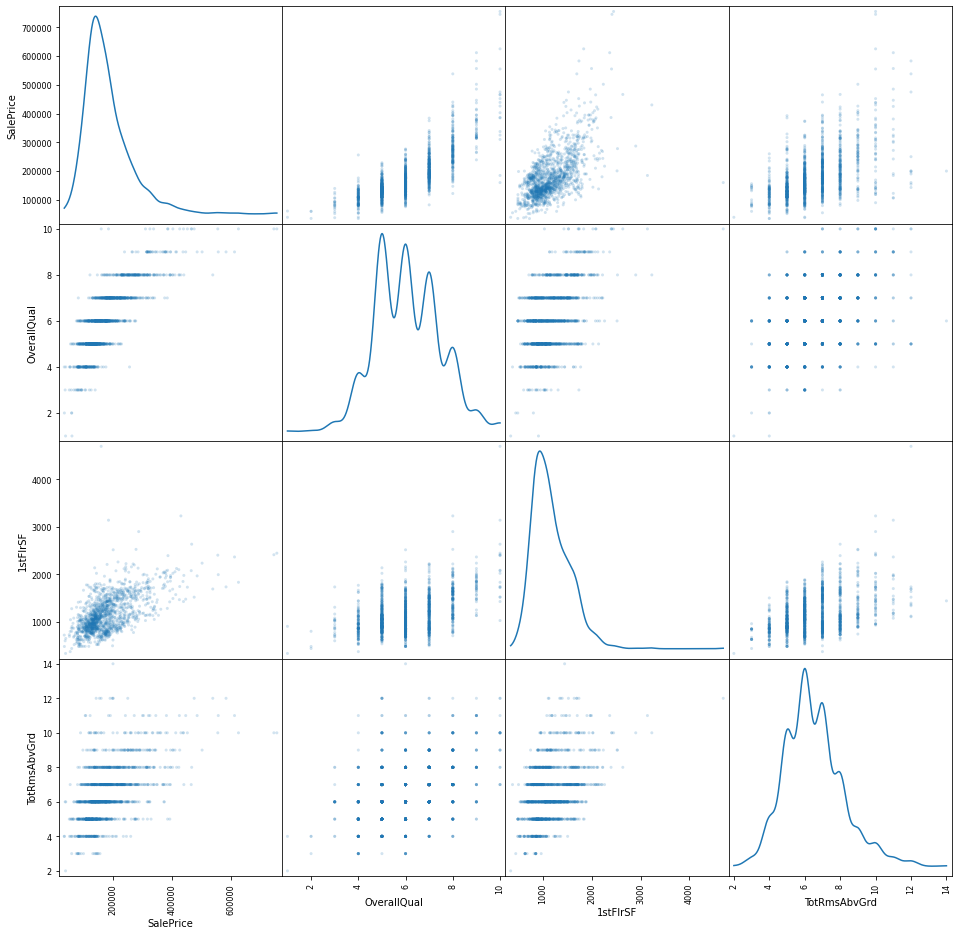

In [8]:
seleccion = data_casas[["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd"]]
# Diagonal = 'kde' means Kernel Density Estimation, 'hist' means Histogram plot
graficas = scatter_matrix(seleccion, alpha = 0.2, figsize = (16, 16), diagonal = 'kde')

In [9]:
#Columnas a utilizar
x_1 = ["OverallQual"]
x_2 = ["OverallQual", "1stFlrSF"]
x_3 = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd"]
y = ["SalePrice"]

# 3.2 Polinomio de grado 1

### 3.2.1 Una (1) variable

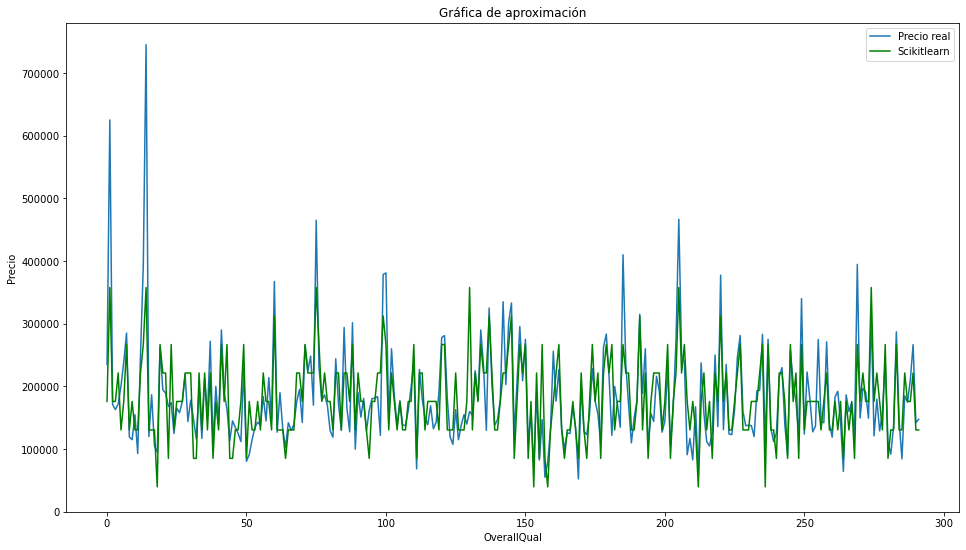

In [10]:
resultados_analisis = realizar_analisis("G1_1V", resultados_analisis, data_training[x_1], data_training[y], data_validation[x_1], data_validation[y], x_1)

### 3.2.2 Dos (2) variables

In [11]:
resultados_analisis = realizar_analisis("G1_2V", resultados_analisis, data_training[x_2], data_training[y], data_validation[x_2], data_validation[y], x_2, False)

### 3.2.2 Tres (3) variables

In [12]:
resultados_analisis = realizar_analisis("G1_3V", resultados_analisis, data_training[x_3], data_training[y], data_validation[x_3], data_validation[y], x_3, False)

# 3.3 Polinomio de grado 2

In [13]:
poly = PolynomialFeatures(2)

### 3.3.1 Una (1) variable

In [14]:
poly_training = poly.fit_transform(np.array(data_training[x_1]))
poly_validation = poly.fit_transform(np.array(data_validation[x_1]))
resultados_analisis = realizar_analisis("G2_1V", resultados_analisis, poly_training, data_training[y], poly_validation, data_validation[y], x_1, False)

### 3.3.2 Dos (2) variables

In [15]:
poly_training = poly.fit_transform(np.array(data_training[x_2]))
poly_validation = poly.fit_transform(np.array(data_validation[x_2]))
resultados_analisis = realizar_analisis("G2_2V", resultados_analisis, poly_training, data_training[y], poly_validation, data_validation[y], x_2, False)

### 3.3.3 Tres (3) variables

In [16]:
poly_training = poly.fit_transform(np.array(data_training[x_3]))
poly_validation = poly.fit_transform(np.array(data_validation[x_3]))
resultados_analisis = realizar_analisis("G2_3V", resultados_analisis, poly_training, data_training[y], poly_validation, data_validation[y], x_3, False)

# 3.4 Polinomio de grado 3

In [17]:
poly = PolynomialFeatures(3)

### 3.4.1 Una (1) variable

In [18]:
poly_training = poly.fit_transform(np.array(data_training[x_1]))
poly_validation = poly.fit_transform(np.array(data_validation[x_1]))
resultados_analisis = realizar_analisis("G3_1V", resultados_analisis, poly_training, data_training[y], poly_validation, data_validation[y], x_1, False)

### 3.4.2 Dos (2) variables

In [19]:
poly_training = poly.fit_transform(np.array(data_training[x_2]))
poly_validation = poly.fit_transform(np.array(data_validation[x_2]))
resultados_analisis = realizar_analisis("G3_2V", resultados_analisis, poly_training, data_training[y], poly_validation, data_validation[y], x_2, False)

### 3.4.3 Tres (3) variables

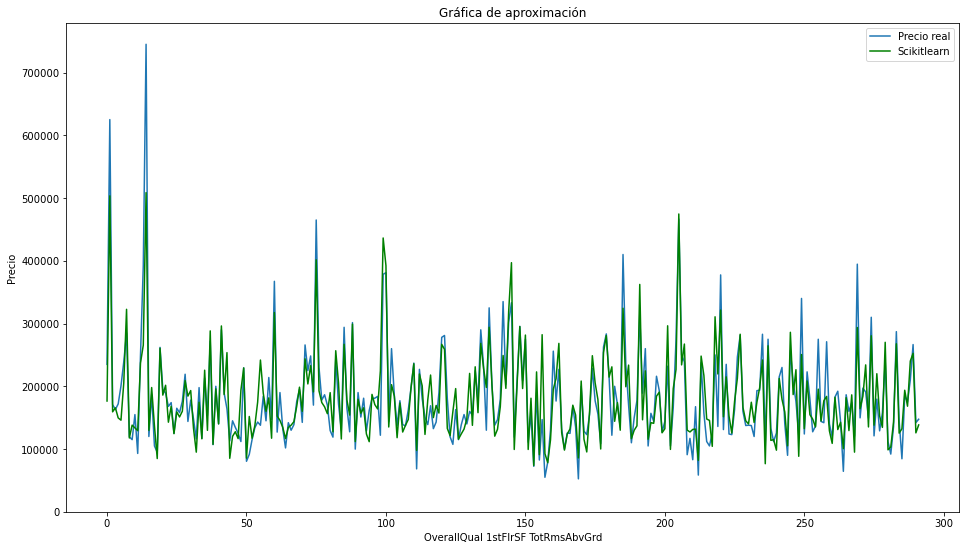

In [20]:
poly_training = poly.fit_transform(np.array(data_training[x_3]))
poly_validation = poly.fit_transform(np.array(data_validation[x_3]))
resultados_analisis = realizar_analisis("G3_3V", resultados_analisis, poly_training, data_training[y], poly_validation, data_validation[y], x_3)

# 4 Análisis hasta de 10 dimensiones

Función para automatizar predicciones utilizando hasta 10 dimensiones

In [21]:
columnas_evaluar = [x_1,x_2,x_3]
for i in range(4,11):
    poly = PolynomialFeatures(i)
    for j in range(0,3):
        poly_training = poly.fit_transform(np.array(data_training[columnas_evaluar[j]]))
        poly_validation = poly.fit_transform(np.array(data_validation[columnas_evaluar[j]]))
        resultados_analisis = realizar_analisis("G"+str(i)+"_"+str(j+1)+"V", resultados_analisis, poly_training, data_training[y], poly_validation, data_validation[y], columnas_evaluar[j], False)

# 5 Conclusión

## 5.1 Tabla de resultados

In [22]:
resultados_analisis.set_index("Algoritmo").round(2)

,MSE,R2 Score
Algoritmo,,
G1_1V,2.630183e+09,0.61
G1_2V,2.392281e+09,0.64
G1_3V,2.391699e+09,0.64
G2_1V,2.255958e+09,0.66
G2_2V,1.829915e+09,0.73
G2_3V,1.845854e+09,0.72
G3_1V,2.225063e+09,0.67
G3_2V,1.463609e+09,0.78
G3_3V,1.357873e+09,0.80


## 5.2 Gráfica de error cuadrado medio

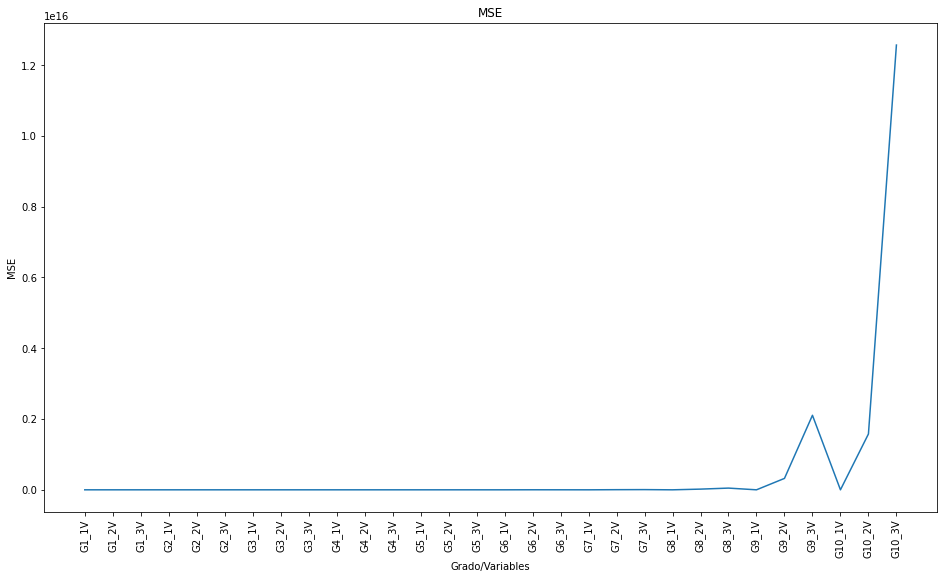

In [23]:
plt.rcParams["figure.figsize"] = (16, 9)
f, ax = plt.subplots(1)
plt.title("MSE")
plt.xlabel('Grado/Variables')
plt.ylabel('MSE')
ax.plot(resultados_analisis.Algoritmo, resultados_analisis.MSE)
plt.xticks(rotation = 90)
plt.show(f)

## 5.3 Gráfica de R2 Score

El punteo R2 determina q ue tan bien la regresión líneal aproxima los valores reales. Tiene un valor de 0 a 1, siendo 1 un valor perfecto.

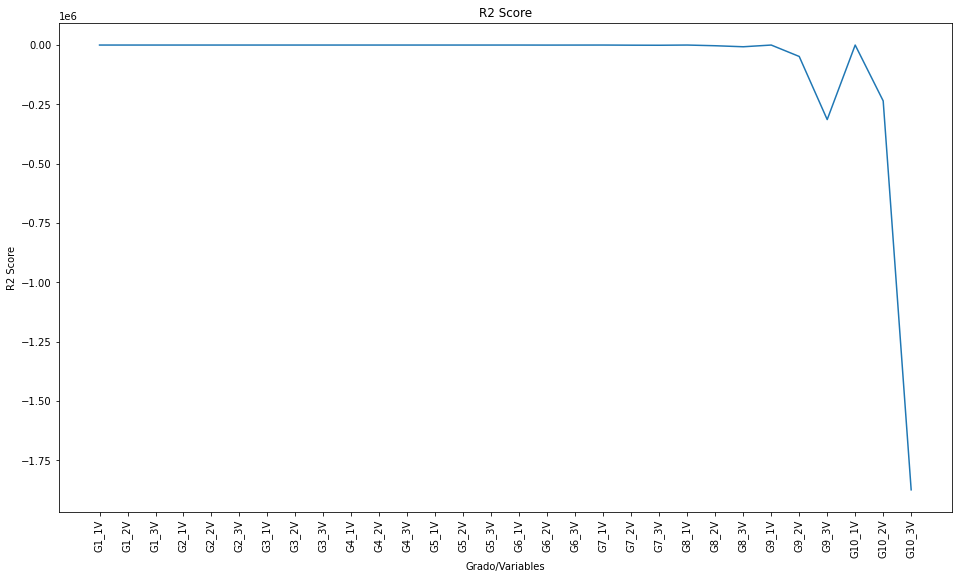

In [24]:
plt.rcParams["figure.figsize"] = (16, 9)
f, ax = plt.subplots(1)
plt.title("R2 Score")
plt.xlabel('Grado/Variables')
plt.ylabel('R2 Score')
ax.plot(resultados_analisis.Algoritmo, resultados_analisis["R2 Score"])
plt.xticks(rotation = 90)
plt.show(f)

## 5.4 Conclusión final

Cuando se utiliza un solo feature para realizar predicción de datos, el algoritmo debe de poder predecir cual es el valor para un nuevo set de datos. Si el nuevo set de datos tiene valores en áreas en donde el algoritmo no entreno, la predicción es mala.

Este es el problema de agregar nuevas dimensiones, cada nueva dimensión estaría agregando más áreas en las cuales el algoritmo necesita información para entrenar y dar una correcta predicción.

En la tabla y gráficas mostradas, se observo que a partir de un polinomio de grado 9 no es posible realizar la predicción. Según los resultados de MSE Y R2 Score, <b>la mejor predicción se obtiene con un grado de polinomio 3 y utilizando las tres variables seleccionadas</b>.